<a href="https://colab.research.google.com/github/udaykbce/Seoul_bike_sharing_prediction/blob/main/Seoul_bike_sharing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -**   Uday Kant
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**



*   List item

*   List item
*   List item


*   List item



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

#Data Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.
Attribute Information:
 * Date : year-month-day
 * Rented Bike count - Count of bikes rented at each hour
 * Hour - Hour of the day
 * Temperature- Temperature in Celsius
 * Humidity - %
 * Windspeed - m/s
 * Visibility - 10m
 * Dew point temperature - Celsius
 * Solar radiation - MJ/m2
 * Rainfall - mm
 * Snowfall - cm
 * Seasons - Winter, Spring, Summer, Autumn
 * Holiday - Holiday/No holiday
 * Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import
from seaborn.rcmod import set_style
# Importing libraries

import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

import datetime as dt
from datetime import datetime

# Importing Models libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading the dataset
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone5/SeoulBikeData.csv', encoding= 'unicode_escape')


In [5]:
# Making a copy of dataset for safety purpose
df = df_original.copy()

### Dataset First View

In [6]:
# Dataset Rows & Columns count
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [7]:
# Dataset First Look
df.shape

(8760, 14)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
# Checking Duplicate Values

print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
#finding the null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

We don't have any missing and duplicate values is the dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Dataset Describe
#Describing the data
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

In [15]:
# Renaming columns for convinence (Camel_Case)
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [16]:
# Changing date feature into three diffrent feature Day, Month, Year.

df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()

# We dont want each day name so we converted it into binary class as Weekdays = 0 & Weekend 1.

df['weekdays_weekend']=df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.
df=df.drop(columns=['Date','day','year'],axis=1)

In [17]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [18]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [19]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

### What all manipulations have you done and insights you found?

Make changes in columns to make it more understandable and easy to use in analysis.

Changing date feature into three diffrent feature Day, Month, Year.

We dont want each day name so we converted it into binary class as Weekdays = 0 & Weekend 1.

Droping unnecessary columns.
Year basically contains details from 2017 december to 2018 november so we considers this is one year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
# Univariate analysis

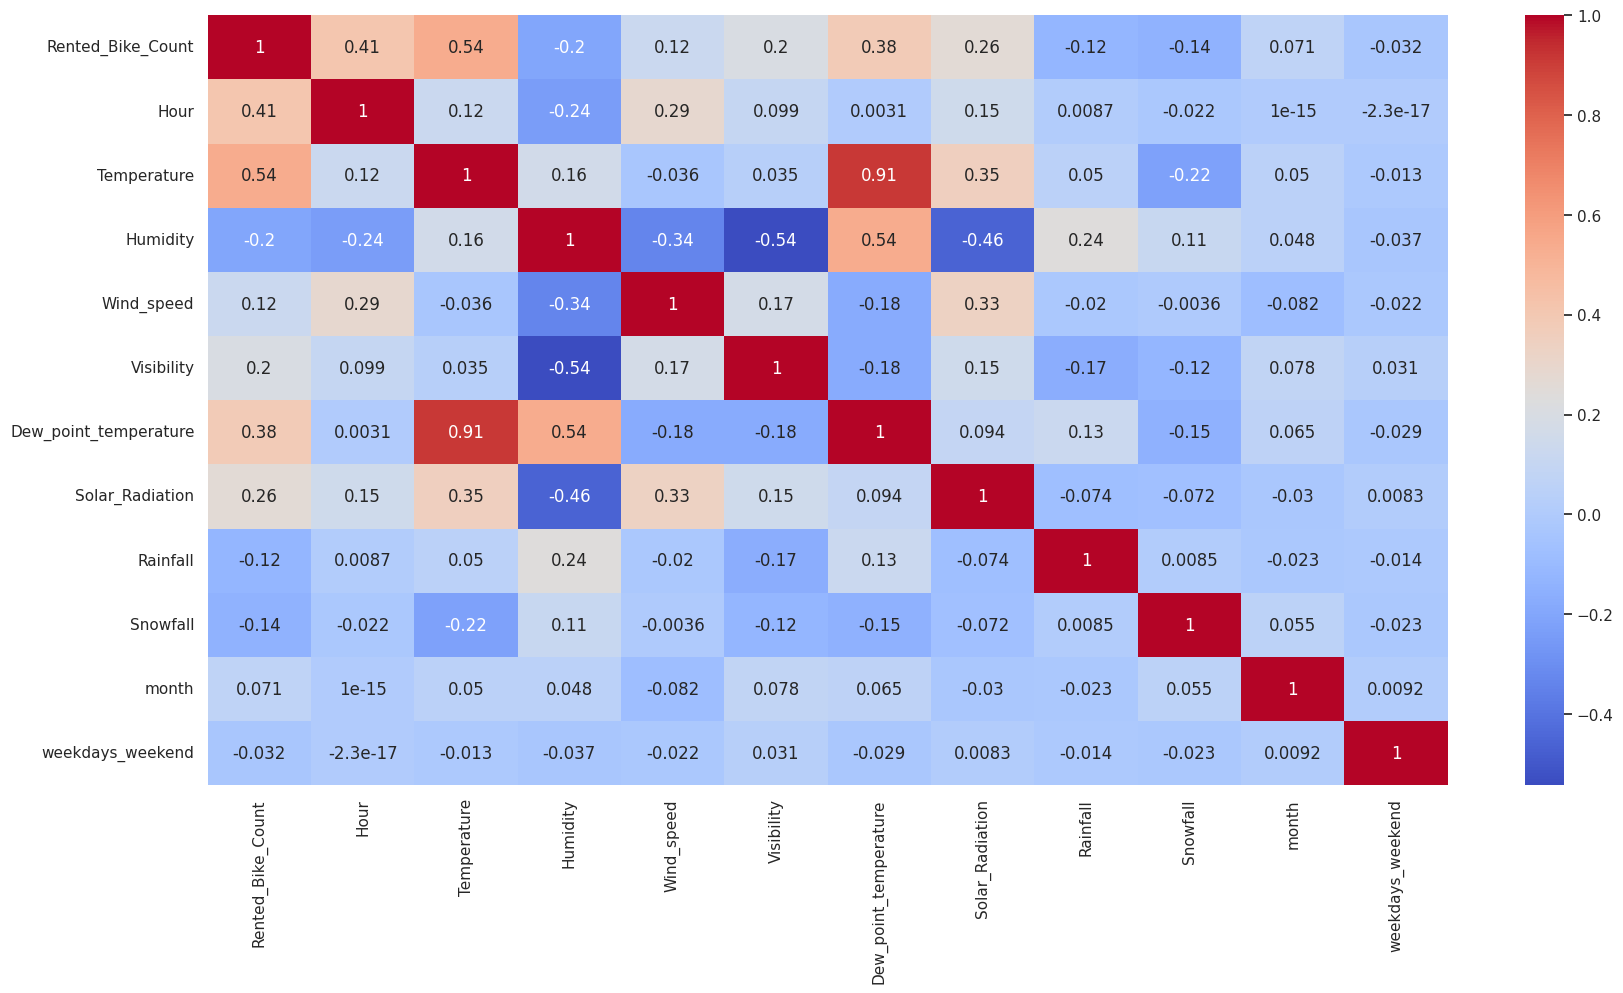

In [20]:
# constructing heat map
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [21]:
# Droping highly correlated features for eleminating Multico-linearity
df=df.drop(['Dew_point_temperature'],axis=1)

##### 1. Why did you pick the specific chart?

cunstruct heat map to check colinearity in features.

##### 2. What is/are the insight(s) found from the chart?

Humidity has low correlation with visibility due to solar radiation.

Dew point temperature and temperature are highly related.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

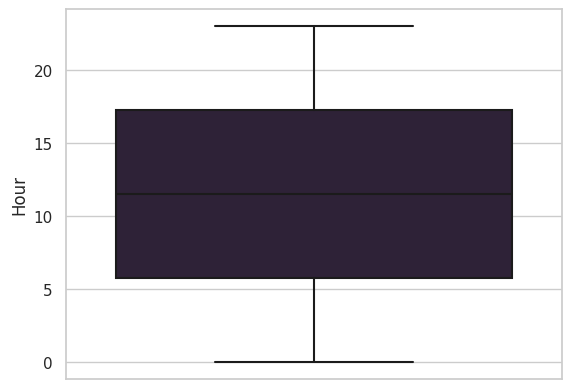

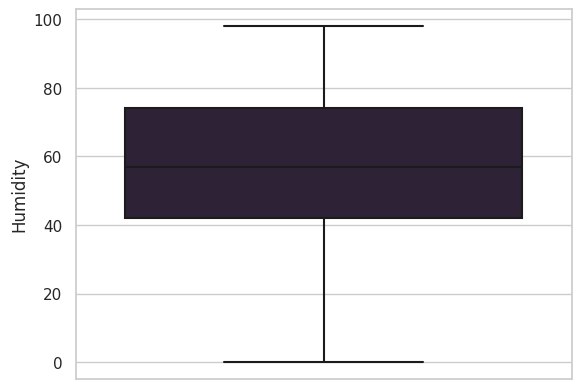

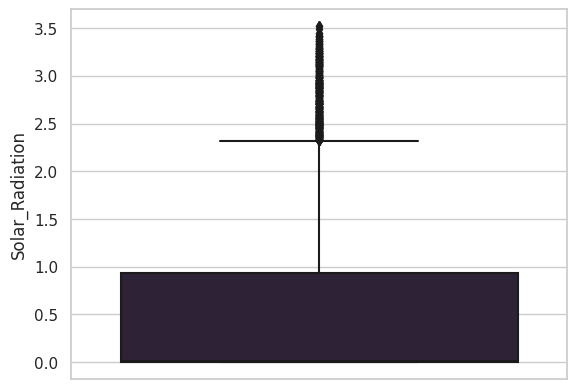

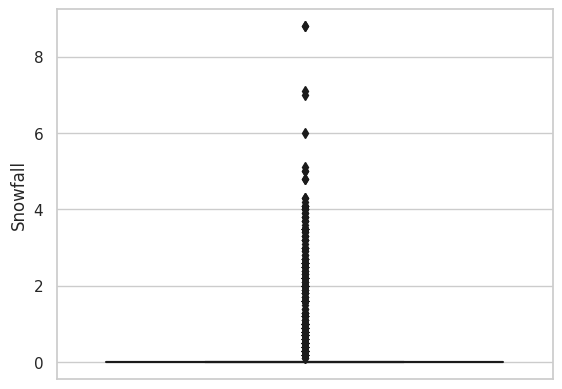

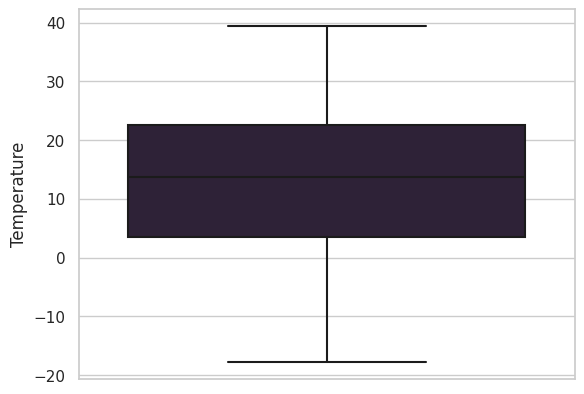

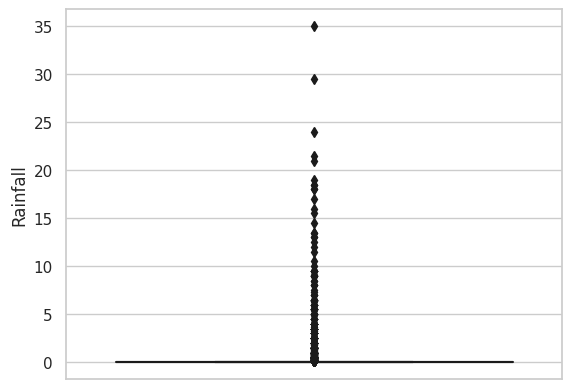

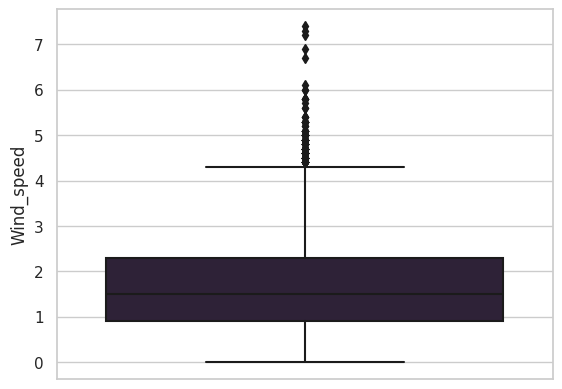

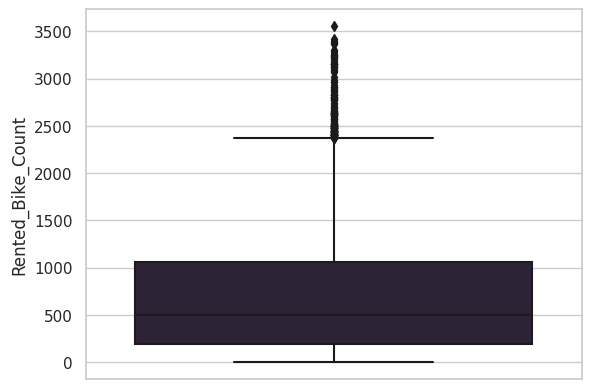

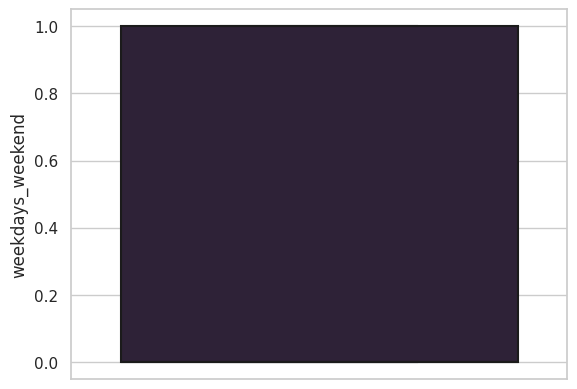

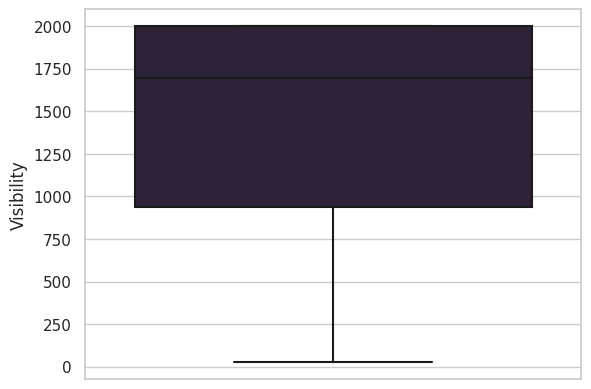

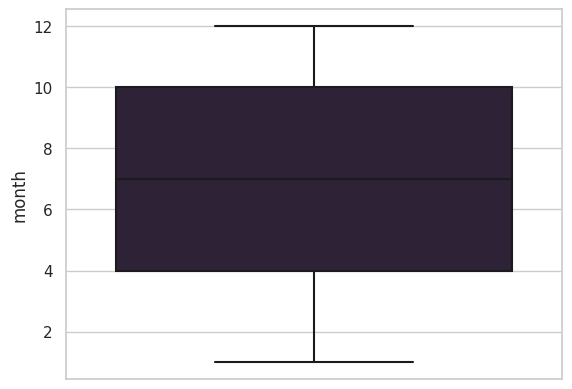

In [22]:
# Chart - 2 visualization code
# Numerical features plotting

num_var = list(set(df.describe()))
for i in num_var:
    sns.boxplot(y = df[i])
    plt.show()

##### 1. Why did you pick the specific chart?

To see the variation of data of all the features.

##### 2. What is/are the insight(s) found from the chart?

Some of features have outlier and skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [23]:
# Chart - 3 visualization code
# cateogrical feature plotting

cat_var = list(set(df.describe(include = 'all')) - set(df.describe()))
cat_var

['Seasons', 'Functioning_Day', 'Holiday']

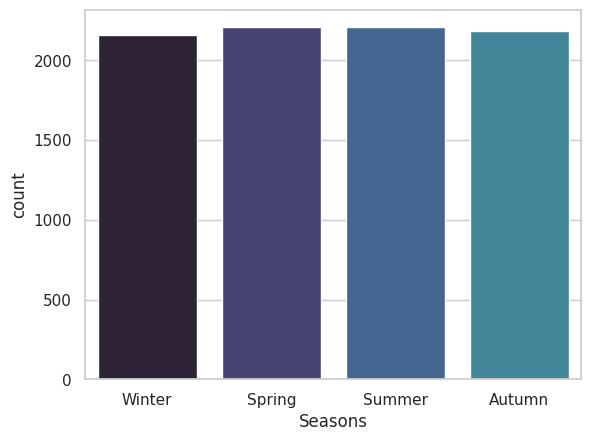

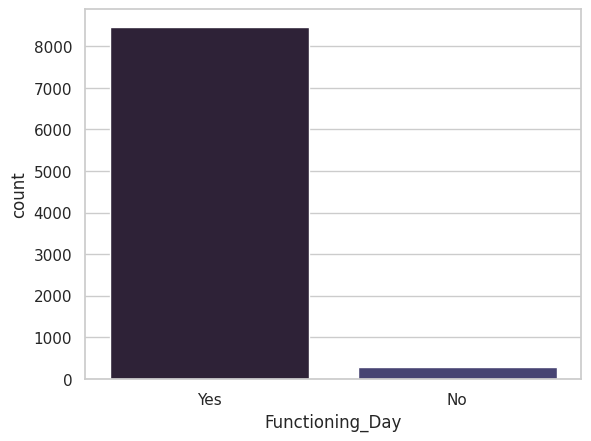

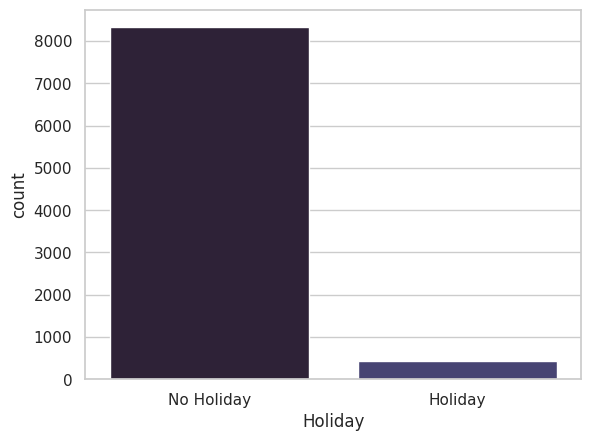

In [24]:
for i in cat_var:
    sns.countplot(x = df[i],)
    plt.show()

##### 1. Why did you pick the specific chart?

To get the count of each features.

##### 2. What is/are the insight(s) found from the chart?

Gives idea about features category count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

# Bivariate analysis

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons ')]

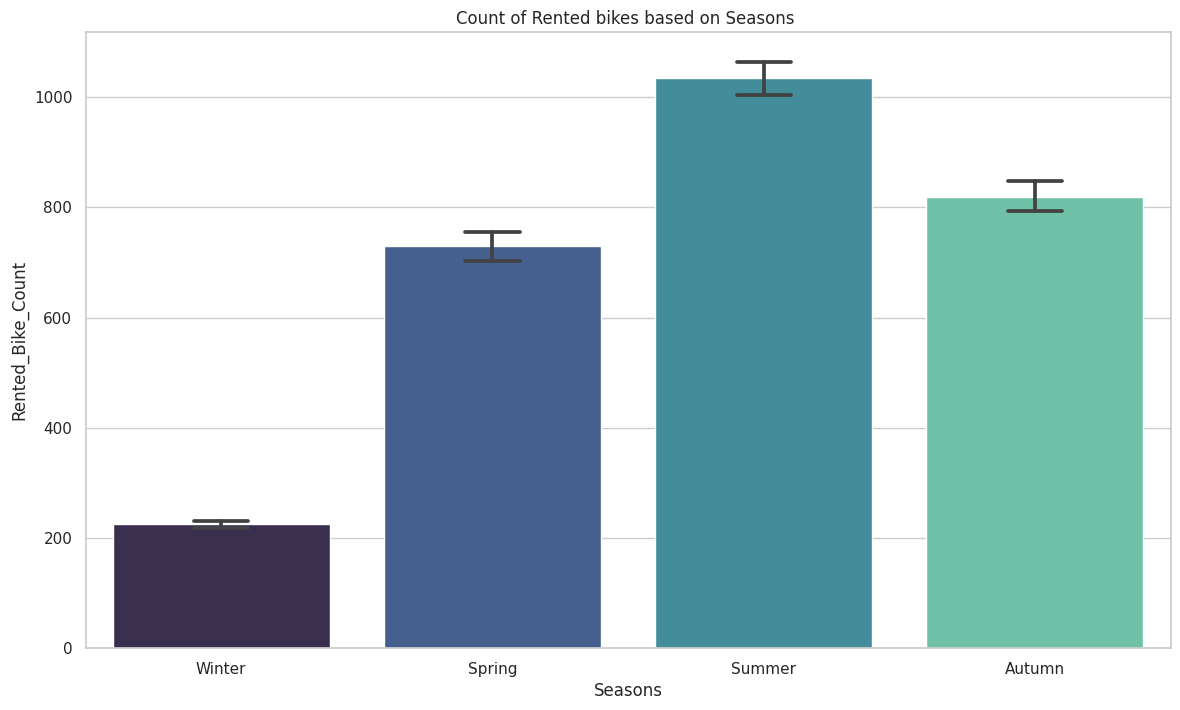

In [25]:
# Chart - 4 visualization code
#analysis of data by vizualisation using seasons and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

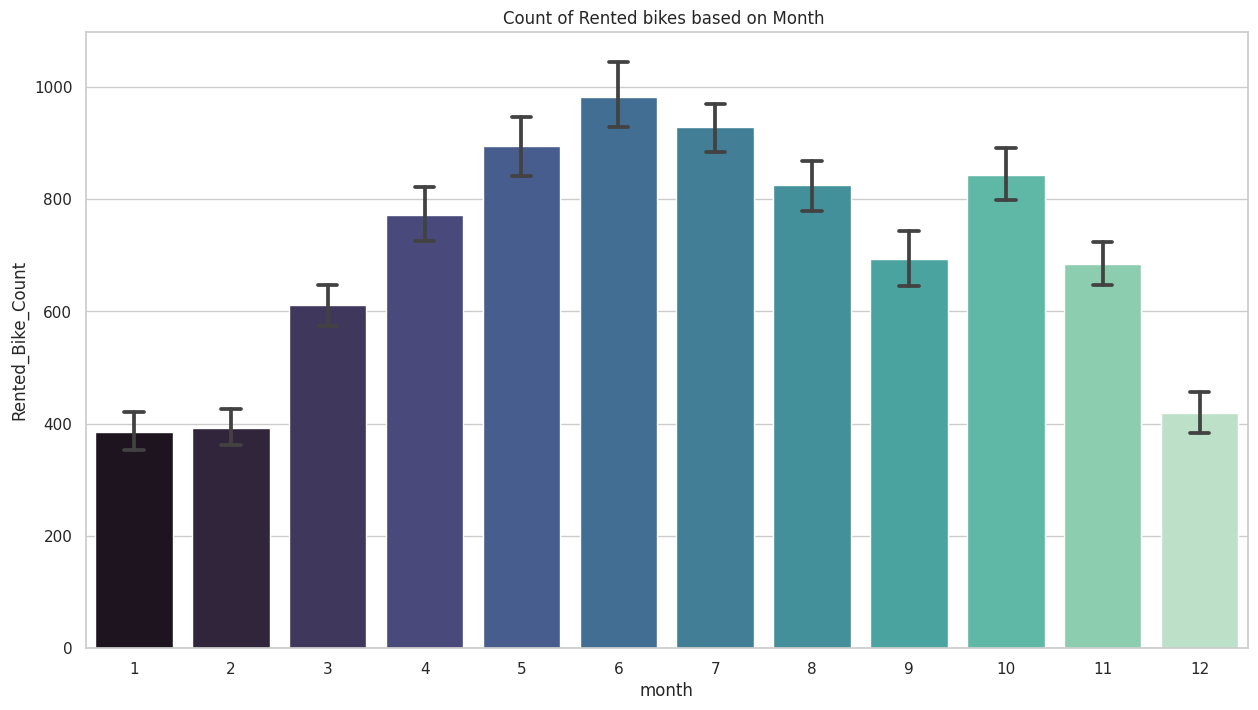

In [26]:
#anlysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Month ')

[Text(0.5, 1.0, 'Count of Rented bikes based on hour ')]

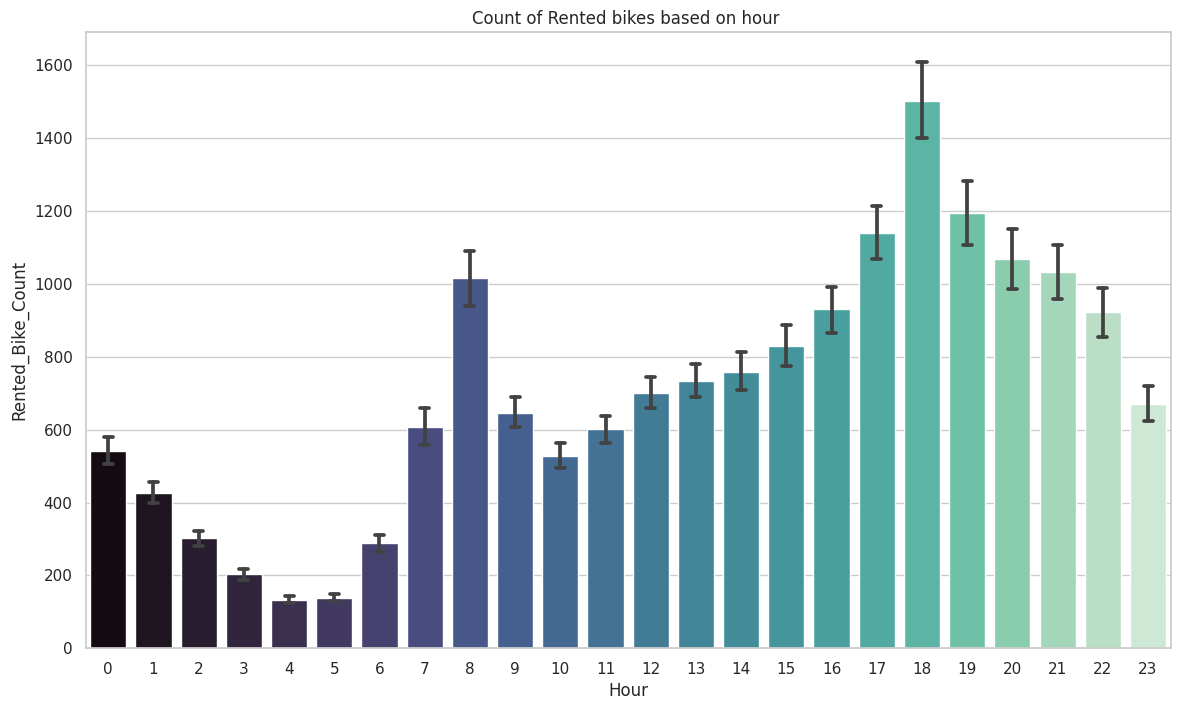

In [27]:
#anlysis of data by vizualisation using hour and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on hour ')

[Text(0.5, 1.0, 'Count of Rented bikes based on weekdays_weekend ')]

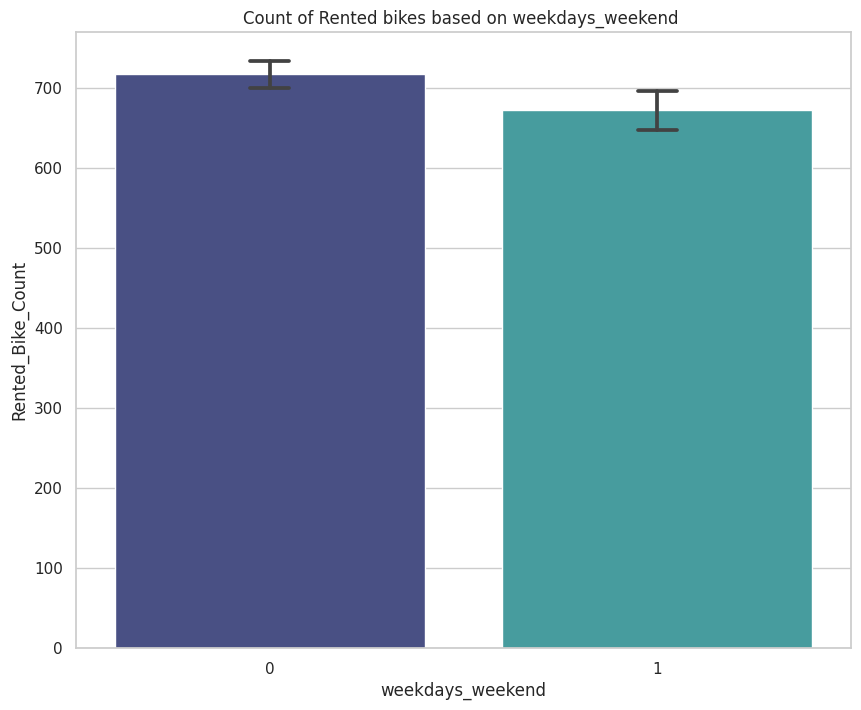

In [28]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on weekdays_weekend ')

In [29]:
#anlysis of data by vizualisation using functioning day and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.1,palette = "mako")
ax.set(title='Count of Rented bikes based on Functioning_Day ')

[Text(0.5, 1.0, 'Count of Rented bikes based on Functioning_Day ')]

[Text(0.5, 1.0, 'Count of Rented bikes based on  Holiday ')]

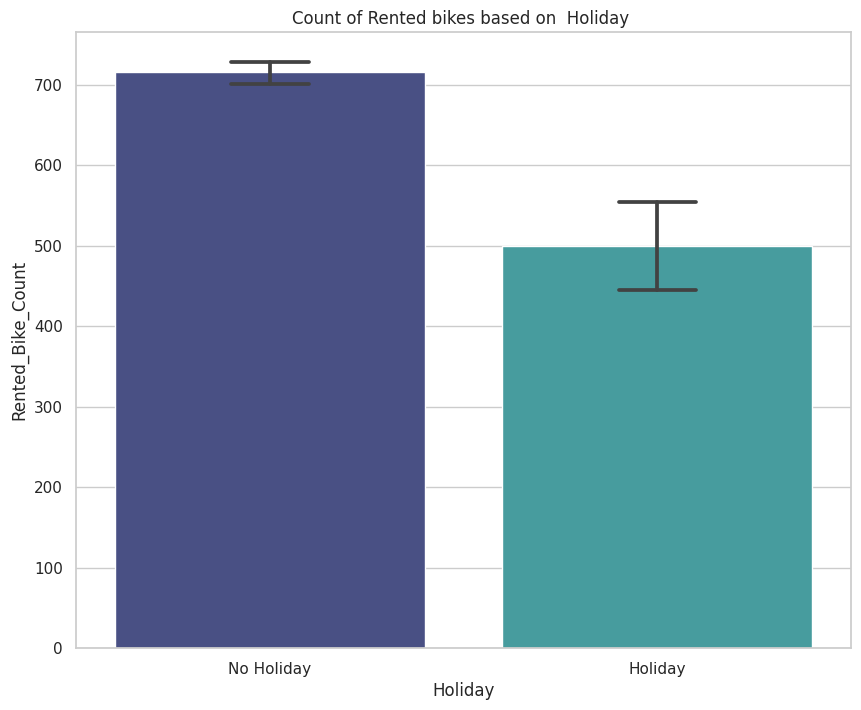

In [30]:
#anlysis of data by vizualisation using holiday and rented bike count.
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on  Holiday ')

##### 1. Why did you pick the specific chart?

To understand the bike requirement on the basis of session, month, time, weekdays or weekend, functioning or non-functioning day, holiday or no-holiday.

##### 2. What is/are the insight(s) found from the chart?

Maximum number of bike rentals in Summer season, while in winter season the bike rentend bike count is low.

This signifies that people enjoy bike riding in pleasant weather.

The demand of the rented bike is high between 5 to 10 months as compare to other months.

People generally use rented bikes during their working hour from 7am to 9am and 5pm to 8pm.

In the week days the demand of the bike is higher because of the office as compare to the weekend.

People use rented bike only in functioning day.

Use of rented bike is more on 'No holiday' means on working days as compare to 'Holiday'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

#Visualizing The Distributions

Visualizing numerical variables distplot :

In [31]:
# Chart - 5 visualization code
#assigning numerical coulmn to variable
num_feat= list(set(df.describe()))
num_feat

['Hour',
 'Humidity',
 'Solar_Radiation',
 'Snowfall',
 'Temperature',
 'Rainfall',
 'Wind_speed',
 'Rented_Bike_Count',
 'weekdays_weekend',
 'Visibility',
 'month']

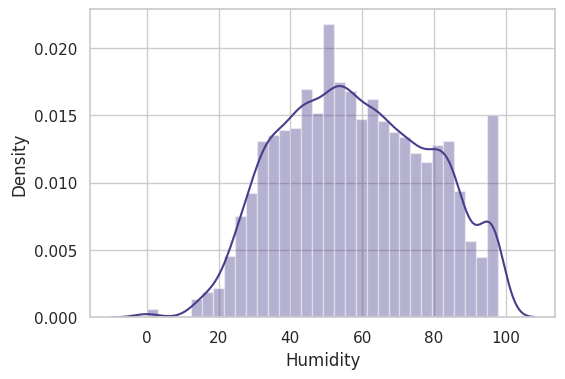

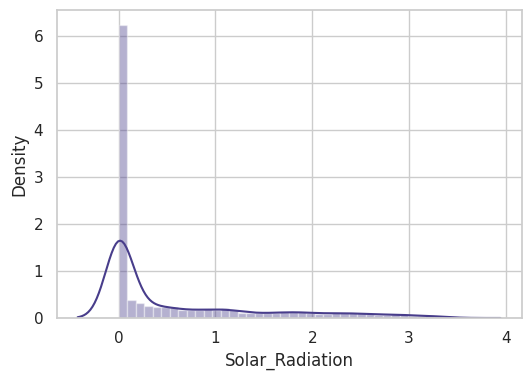

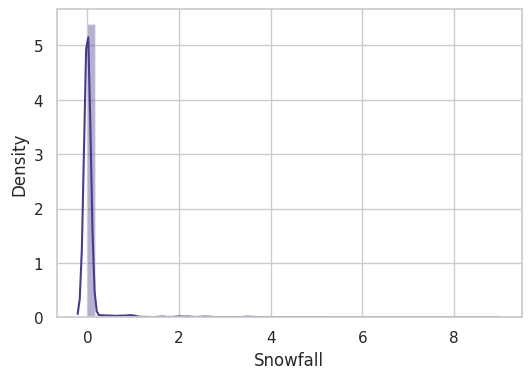

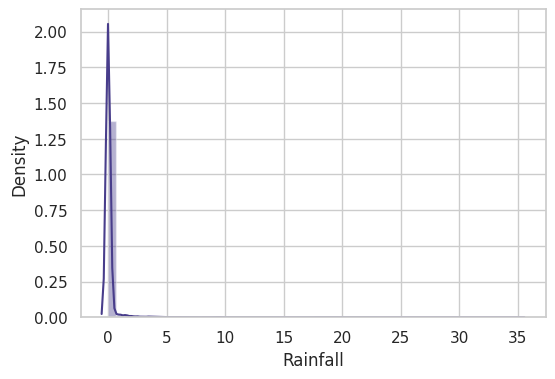

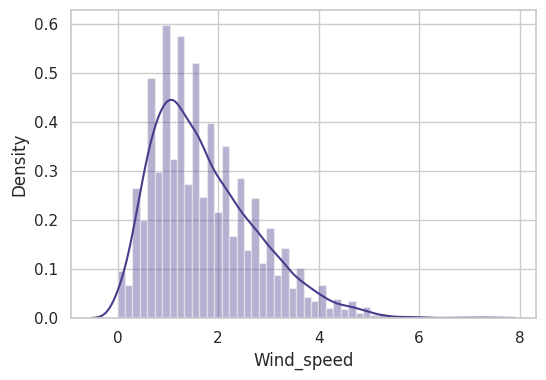

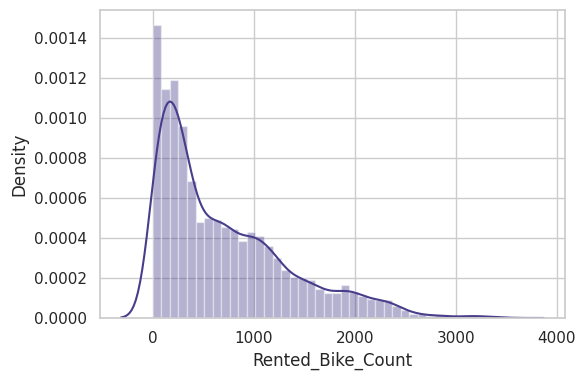

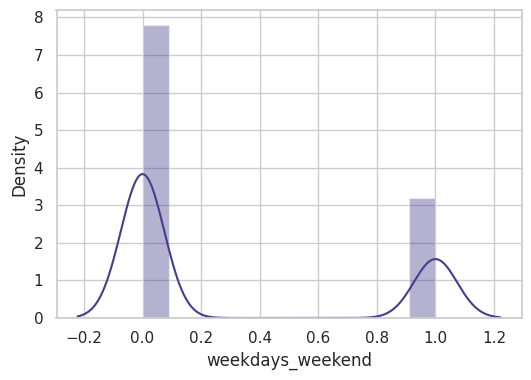

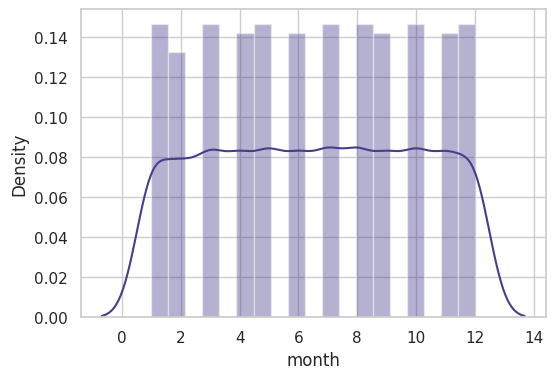

In [32]:
#plotting distplots to analyze the distribution of all numerical features
for col in num_feat:
  plt.figure(figsize=(6,4))
  sns.distplot(x=df[col],color= 'darkslateblue')
  plt.xlabel(col)
plt.show()

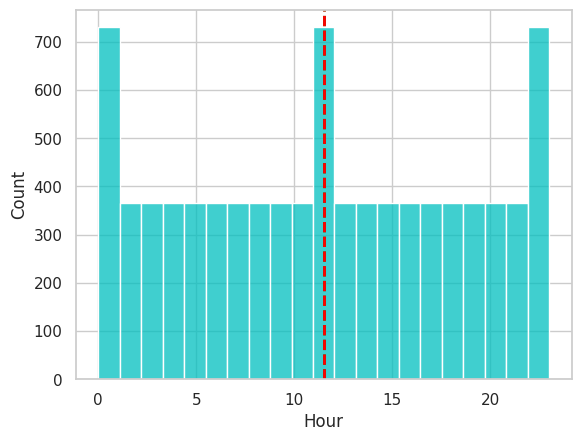

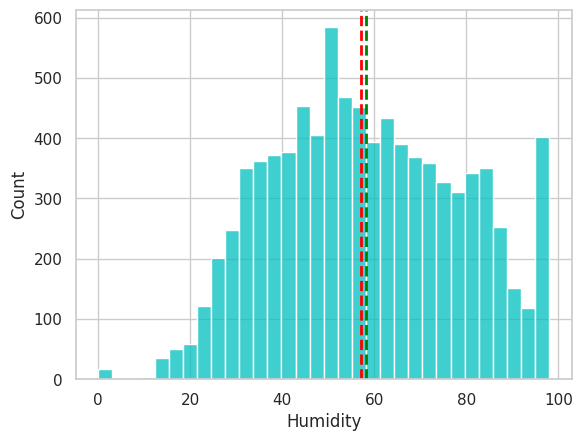

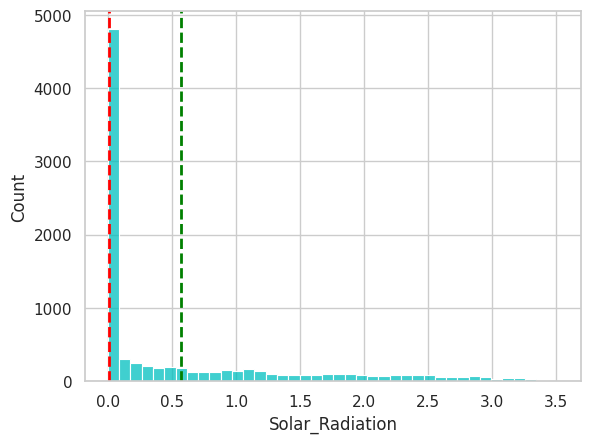

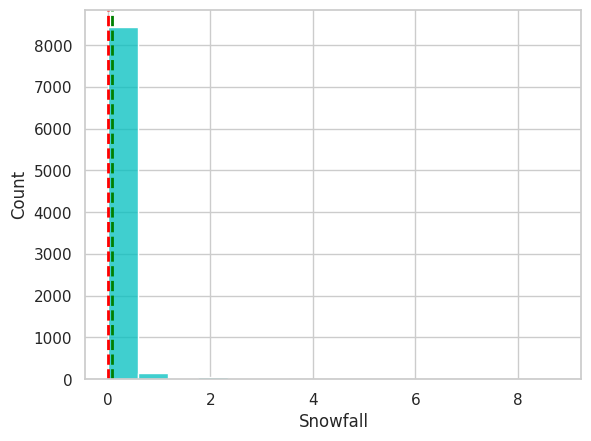

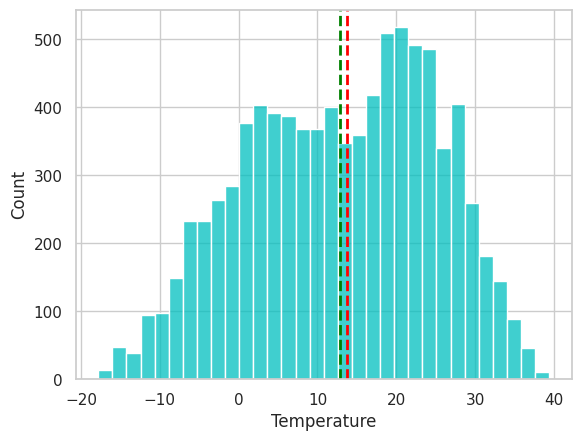

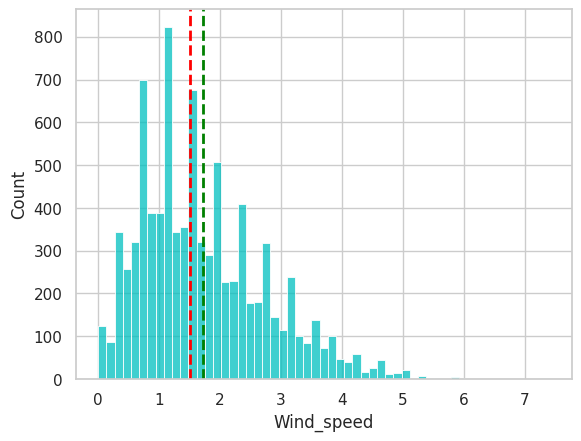

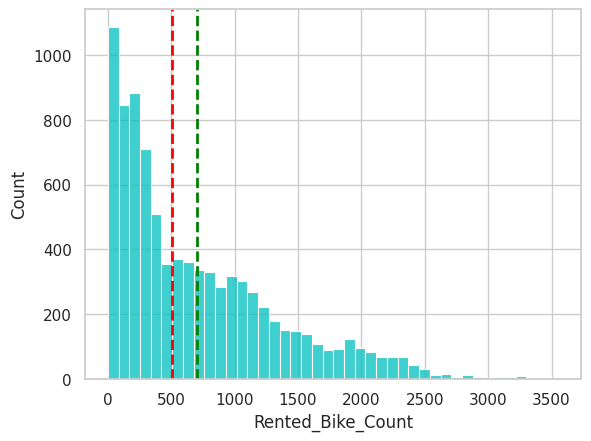

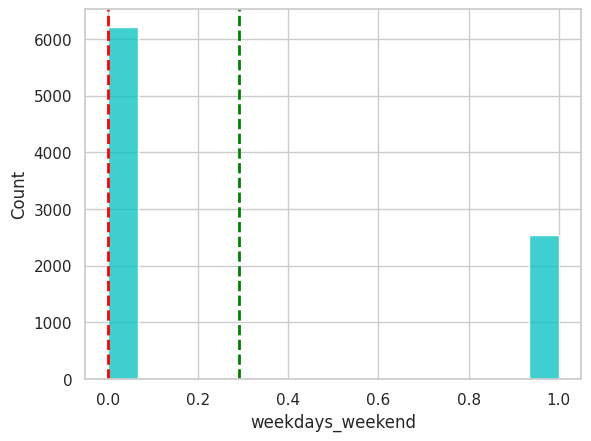

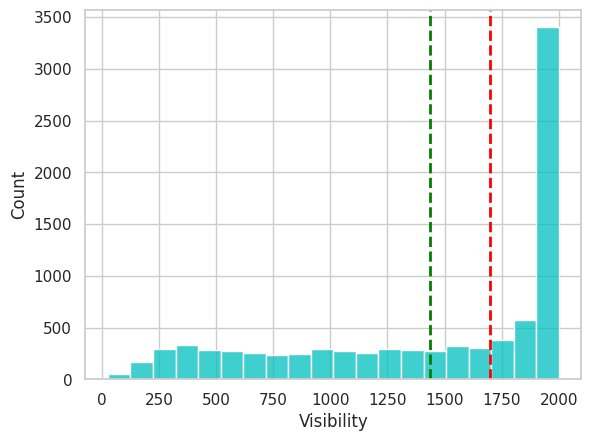

In [33]:
#plotting histogram with mean and median

for col in num_feat[:]:
  sns.histplot(df[col],color= 'c')
  plt.axvline(df[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)
  plt.show()

##### 1. Why did you pick the specific chart?

To visualize the skewness of the data of each features.

##### 2. What is/are the insight(s) found from the chart?

Some of the distributions are right skewed while some are left skewed so mean and median are also skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

#Regression Plotting Of Features

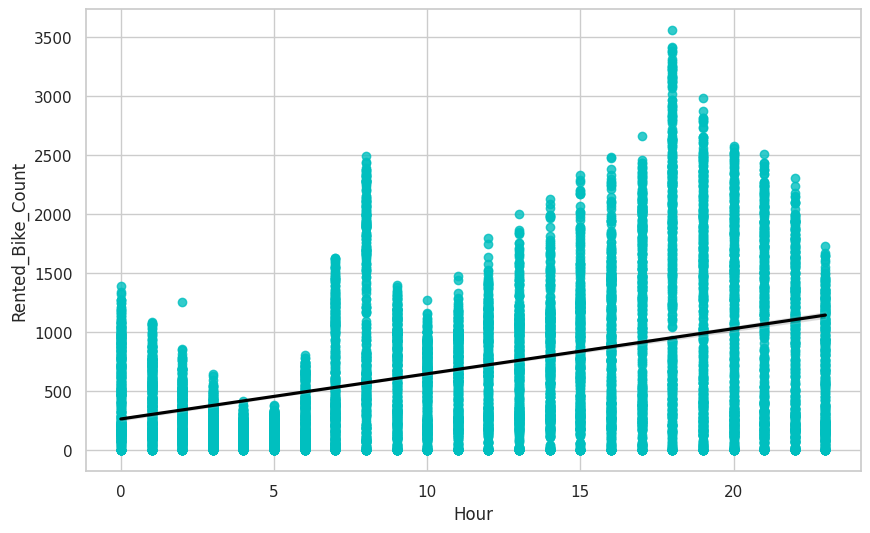

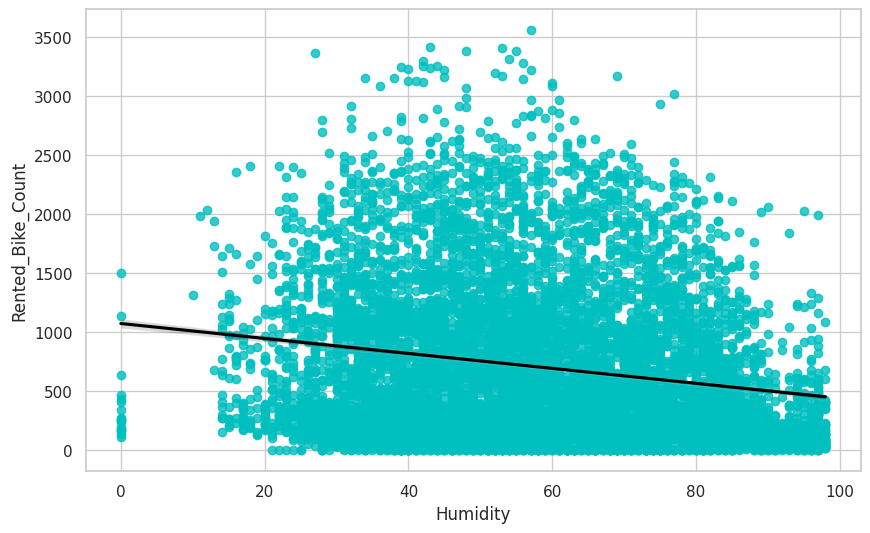

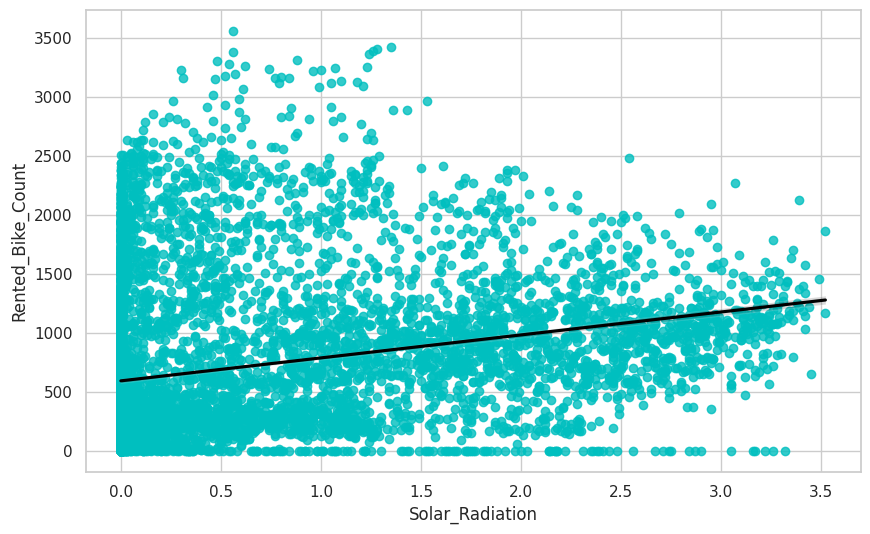

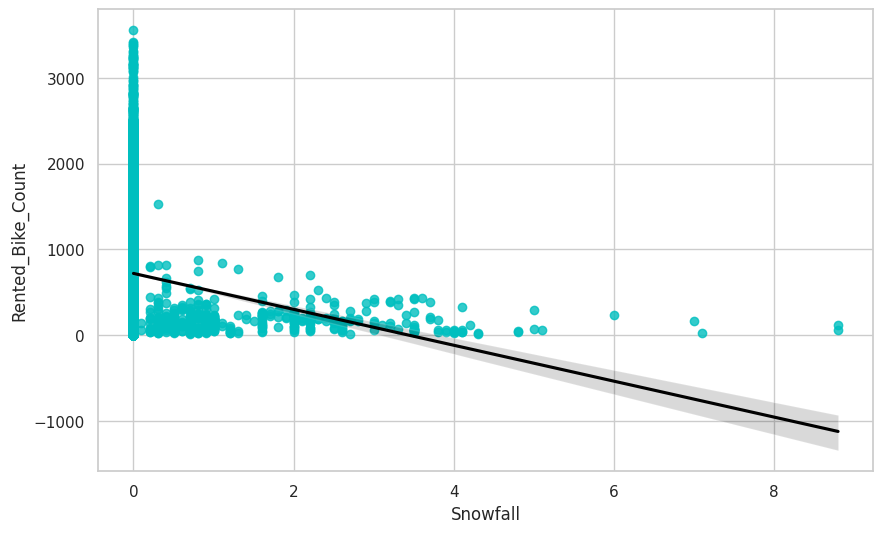

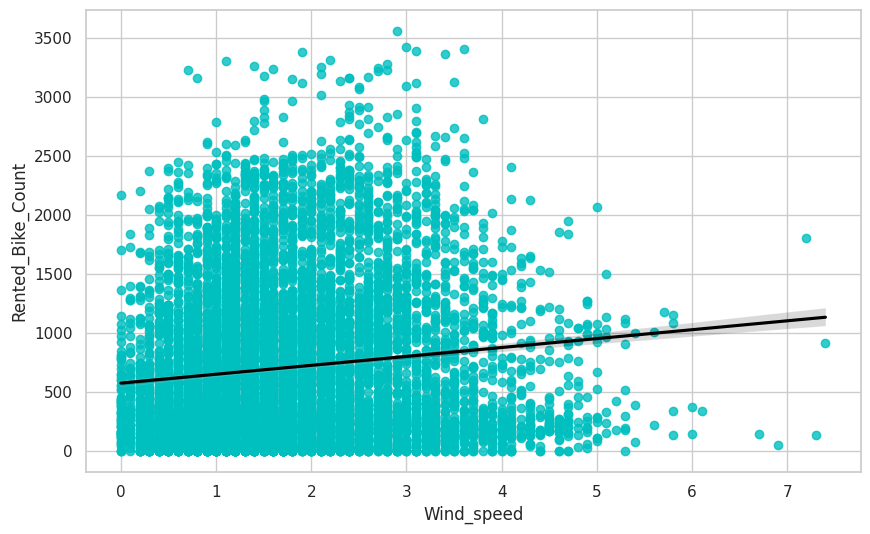

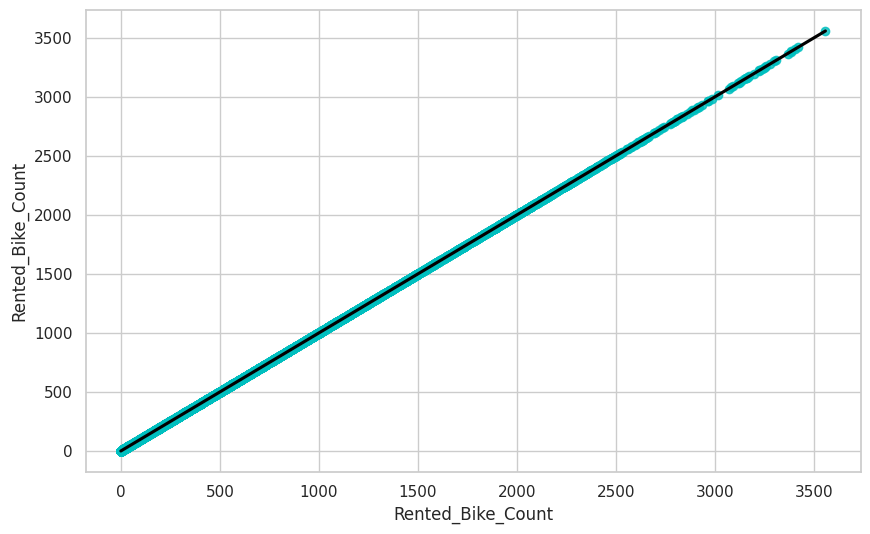

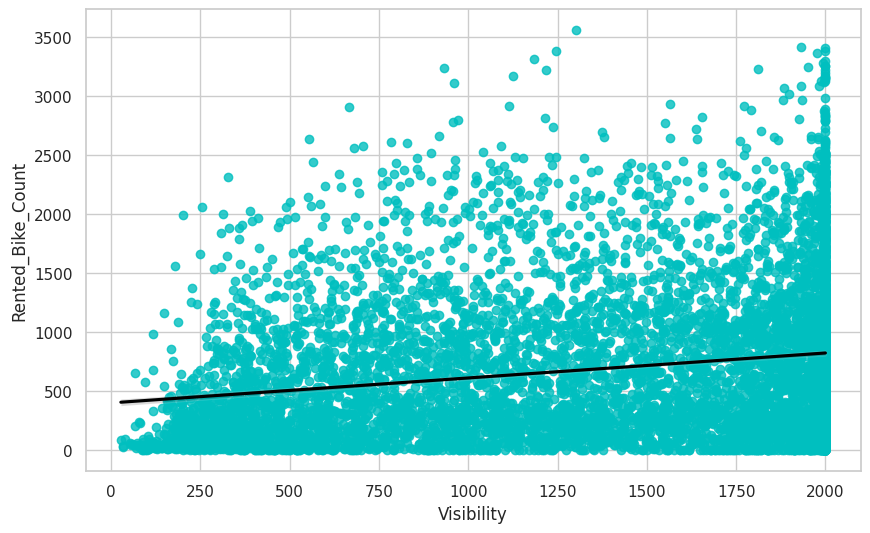

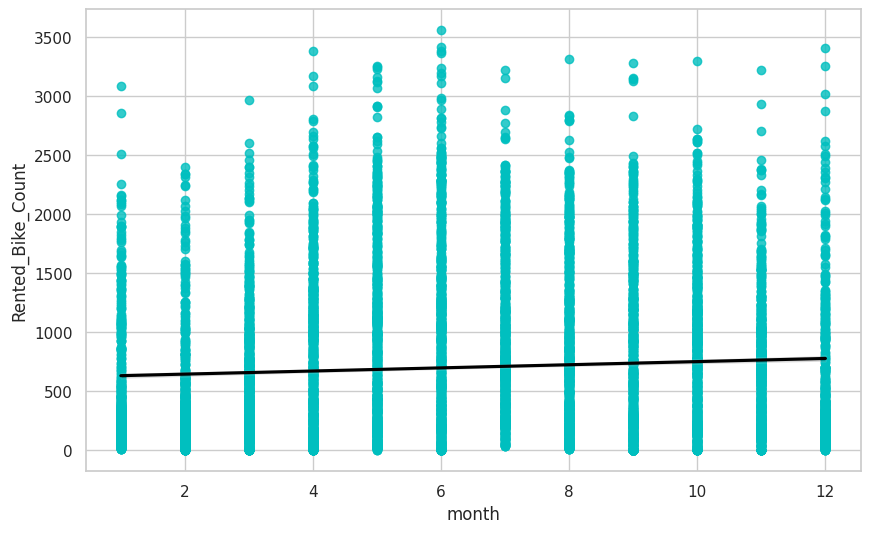

In [75]:
#plotting the regression plot for all the numerical features
for col in num_feat:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'c'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

To see the relationship between rented bike count and all features.

##### 2. What is/are the insight(s) found from the chart?

The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.

Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

#Normalising Rented_Bike_Count Column Data.

In [76]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(df['Rented_Bike_Count'])

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

In [77]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df['Rented_Bike_Count']))

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

##### 1. Why did you pick the specific chart?

To check the skewness of rented_bike_count feature.

##### 2. What is/are the insight(s) found from the chart?

Rented Bike Count has moderate skewness toward right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.

After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***6. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding
#Creating dummy variables and performing the one hot encoding to the dataset

In [78]:
# Encode your categorical columns
#Changing the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df[col]=df[col].astype('category')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


In [80]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=True)
df1.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  month_4  month_5  \
0              0.0       0.0       0.0       0       0  ...        0        0   
1              0.0       0.0       0.0       1       0  ...        0        0   
2              0.0       0.0       0.0       0       1  ...        0        0   
3              0.0       0.0       0.0       0       0  ...        0        0   
4              0.0       0.0       0.0       0       0  ...        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0        0        0        0        0         0         0         0   
1        0        0        0        0         0         0         0   
2        0        0        0        0         0         0         0   
3        0        0        0        0         0         0         0   
4        0        0        0        0         0         0         0   

   weekdays_weekend_1  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 48 columns]

## ***7. ML Model Implementation***

**Model Training**

### ML Model - 1

In [81]:
# Data spliting and value assigning to variables for Reggression

X = df1.drop(columns = ['Rented_Bike_Count'] , axis = 1)
y = np.sqrt(df1['Rented_Bike_Count'])

In [82]:
X.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
0         -5.2        37         2.2        2000              0.0       0.0   
1         -5.5        38         0.8        2000              0.0       0.0   
2         -6.0        39         1.0        2000              0.0       0.0   
3         -6.2        40         0.9        2000              0.0       0.0   
4         -6.0        36         2.3        2000              0.0       0.0   

   Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  month_7  \
0       0.0       0       0       0  ...        0        0        0        0   
1       0.0       1       0       0  ...        0        0        0        0   
2       0.0       0       1       0  ...        0        0        0        0   
3       0.0       0       0       1  ...        0        0        0        0   
4       0.0       0       0       0  ...        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0        0        0         0         0         0                   0  
1        0        0         0         0         0                   0  
2        0        0         0         0         0                   0  
3        0        0         0         0         0                   0  
4        0        0         0         0         0                   0  

[5 rows x 47 columns]

In [83]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

#Implementing Linear Regression.

In [84]:
# Train test spliting

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape

(6570, 47)


(2190, 47)

In [85]:
# initalizing the model
regg = LinearRegression().fit(X_train,y_train)

In [86]:
# Checking score
regg.score(X_train,y_train)

0.7557884266778845

In [88]:
#Checking Coefficent
regg.coef_

array([ 4.76592857e-01, -1.37389872e-01, -1.45055135e-01,  5.60074648e-04,
        1.09746012e+00, -1.47539559e+00,  1.91445977e-02, -1.98243149e+00,
       -5.02829279e+00, -7.33272935e+00, -9.57684190e+00, -9.14567640e+00,
       -4.15101144e+00,  2.10516425e+00,  7.21001444e+00,  9.18589247e-01,
       -3.49505813e+00, -3.79366402e+00, -3.07652970e+00, -3.28984917e+00,
       -3.46328474e+00, -2.12611279e+00,  2.63457209e-02,  3.81196406e+00,
        1.02756294e+01,  6.86306739e+00,  6.21187858e+00,  6.33587517e+00,
        5.07654627e+00,  1.45916926e+00, -2.62867121e+00, -3.38160787e+00,
       -6.54244484e+00,  2.95423516e+00,  2.77747454e+01, -8.06203753e-01,
        2.64506479e-01,  3.22771507e-01,  1.45208025e+00,  4.35283784e+00,
       -1.95727651e-01, -7.51151800e-01,  3.32783165e-01,  2.19197225e+00,
        1.08610102e+00,  1.19136471e+00, -7.27039129e-01])

In [87]:
# Predicted Train & Test values

y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score chart
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.60630594639787
RMSE : 6.132398058377968
MAE : 4.658244745512177
R2 : 0.7557884266778845
Adjusted R2 : 0.7504299094294534


In [90]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [92]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.64474647323366
RMSE : 6.053490437196846
MAE : 4.658361507344823
R2 : 0.7680218977120629
Adjusted R2 : 0.7629318086329158


In [93]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

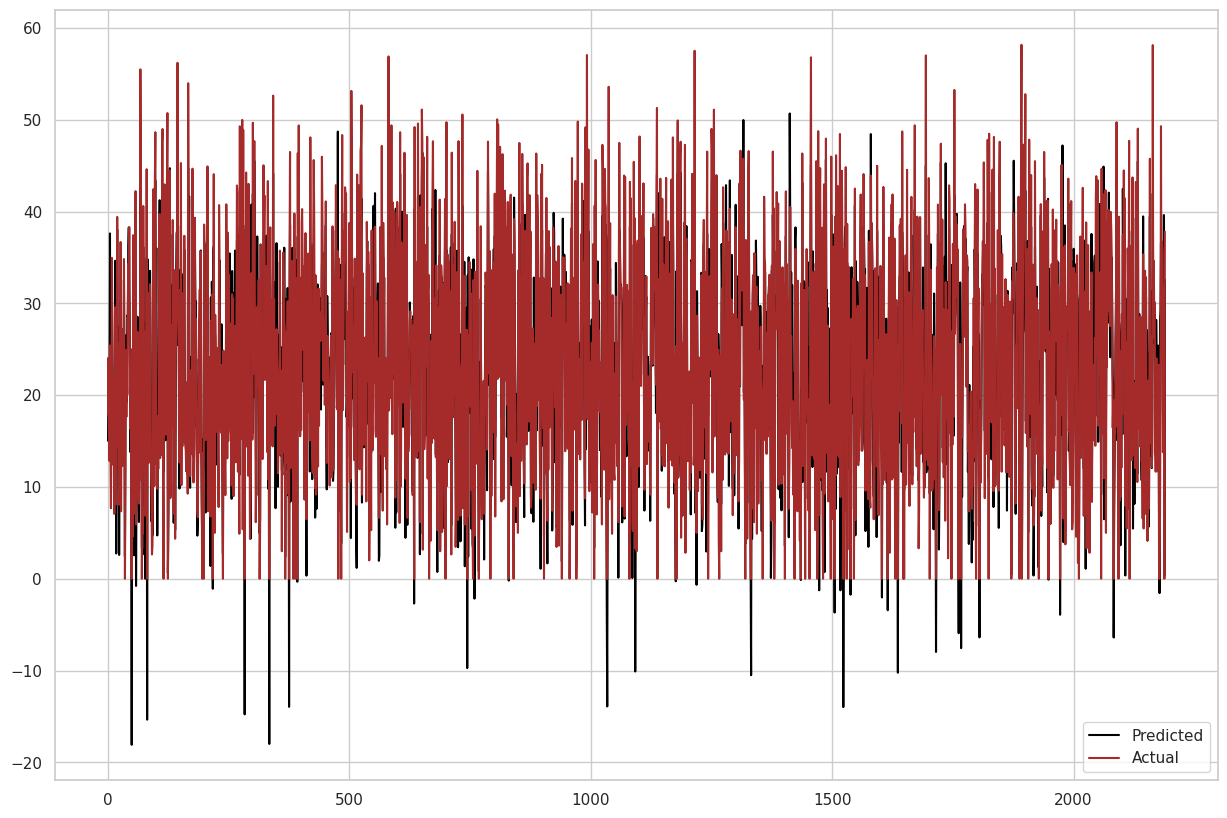

In [100]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test, color='k')
plt.plot(np.array(y_test), color='brown')
plt.legend(["Predicted","Actual"])
plt.show()

### ML Model - 2

#Implementing Ridge regression (L2 Regularization)

In [101]:
# Initalizing ridge regression
ridge = Ridge(alpha = 0.1)

ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [102]:
#checking score

ridge.score(X_train,y_train)

0.7557883433655243

In [103]:
# Predicted Train & Test values

y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [104]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 37.60631877572478
RMSE : 6.13239910440643
MAE : 4.658340946942368
R2 : 0.7557883433655243
Adjusted R2 : 0.7504298242890441


In [105]:

# Making a dataset for comparing performance metrics later

dict1={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [106]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_ridge))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_ridge))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 36.646577616668694
RMSE : 6.053641682216473
MAE : 4.658618929538894
R2 : 0.7680103057317668
Adjusted R2 : 0.7629199623001108


In [107]:
dict2={'Model':'Ridge regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [111]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_ridge, color='k')
plt.plot(np.array(y_test), color='lightblue')
plt.legend(["Predicted","Actual"])
plt.show()

### ML Model - 3

#Implementing Lasso regression (L1 Regularization)

In [112]:
# Initalizing lasso regression
lasso = Lasso(alpha = 1, max_iter= 1000)
lasso.fit(X_train, y_train)

# Creating the model score
print(lasso.score(X_test, y_test))
print(lasso.score(X_train, y_train))

0.3873692800799008
0.40519624904934015


In [114]:
# Predicted Train & Test values
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [115]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


In [116]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [117]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_lasso))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_lasso))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


In [118]:
dict2={'Model':'Lasso regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

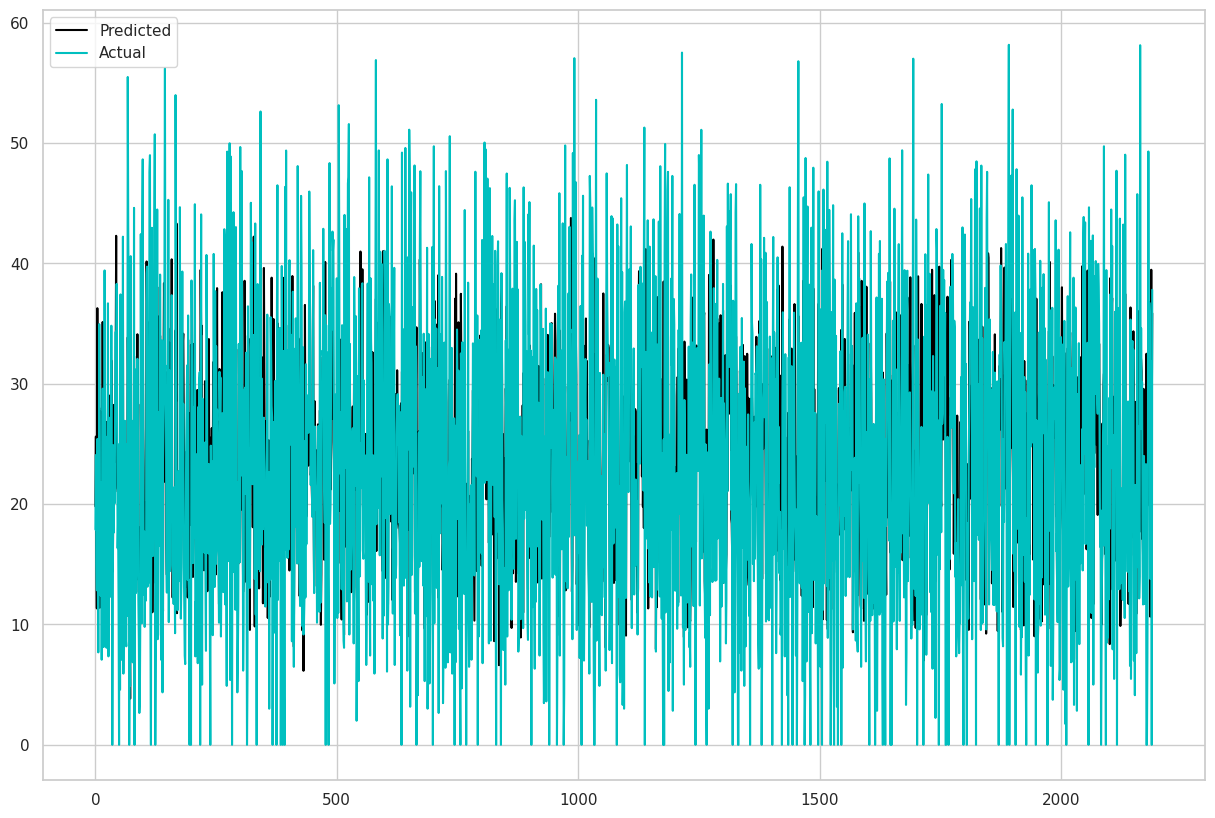

In [119]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_lasso, color='k')
plt.plot(np.array(y_test), color='c')
plt.legend(["Predicted","Actual"])
plt.show()

####ML Model - 4

# Implementing Decision Tree Regression

In [126]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8, max_features=9, max_leaf_nodes=100)

In [127]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100)

In [129]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [130]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 48.19484642465279
RMSE : 6.942250818333546
MAE : 5.1236093097914726
R2 : 0.6870275084141957
Adjusted R2 : 0.6801602315213233


In [131]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [132]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 60.334741400182914
RMSE : 7.767544103523514
MAE : 5.606780041776427
R2 : 0.6180533320848276
Adjusted R2 : 0.6096726162155405


In [133]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Decision tree regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

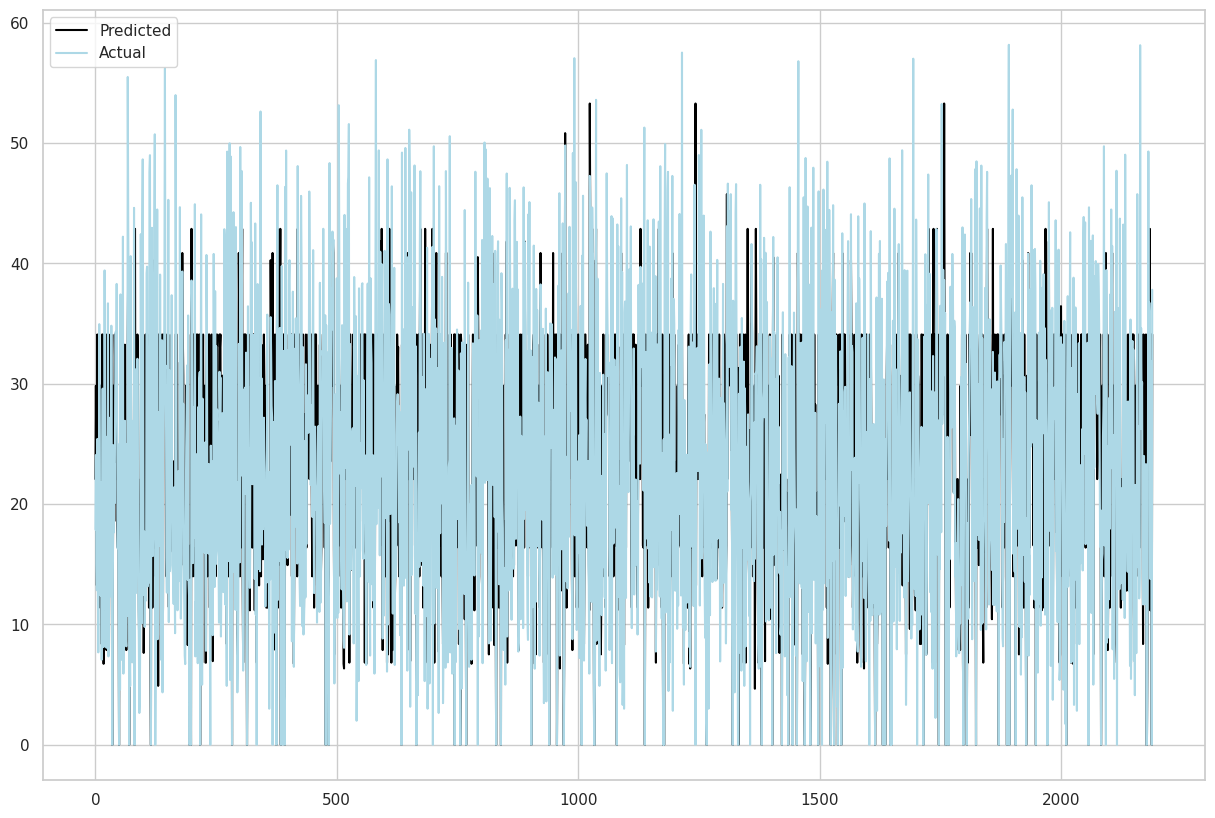

In [134]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_d, color='k')
plt.plot(np.array(y_test), color='lightblue')
plt.legend(["Predicted","Actual"])
plt.show()

####ML model- 5
#Implementng Random Forest Regression


In [135]:
# Initalizing the Model
rf_model = RandomForestRegressor()

In [136]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [137]:
#Train test values
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [138]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 2.068456388863707
RMSE : 1.4382129149968397
MAE : 0.9493803053783968
R2 : 0.986567651983883
Adjusted R2 : 0.9862729179237721


In [139]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [140]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_rf))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_rf))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 15.946872558915961
RMSE : 3.9933535479488866
MAE : 2.5920801806741
R2 : 0.8990489609104816
Adjusted R2 : 0.896833882088256


In [141]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [142]:
# Feature importances
rf_model.feature_importances_

array([3.18743886e-01, 1.62661168e-01, 1.40157101e-02, 1.47508589e-02,
       3.27287227e-02, 3.26584375e-02, 1.13239395e-03, 4.39947085e-03,
       1.24863147e-02, 2.02699438e-02, 2.82648346e-02, 2.50945779e-02,
       8.14629054e-03, 3.79654829e-03, 1.29594444e-02, 8.49544225e-04,
       2.44613603e-03, 1.10503011e-03, 2.15114748e-04, 1.81569856e-04,
       3.37166770e-04, 1.36580852e-03, 3.53043490e-03, 1.06478485e-02,
       3.10925271e-02, 1.76303151e-02, 1.25723545e-02, 1.29422821e-02,
       9.43928073e-03, 4.09923933e-03, 6.25977807e-03, 1.35903414e-03,
       1.03766778e-02, 3.00216587e-03, 1.49845586e-01, 1.02215729e-03,
       2.81623177e-03, 1.59330634e-03, 1.93665208e-03, 1.45081480e-03,
       1.16390735e-03, 1.77392122e-03, 1.91400122e-03, 1.83891804e-03,
       3.01349533e-03, 7.09126992e-04, 9.36097041e-03])

In [143]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [151]:
plt.style.use('_classic_test_patch')

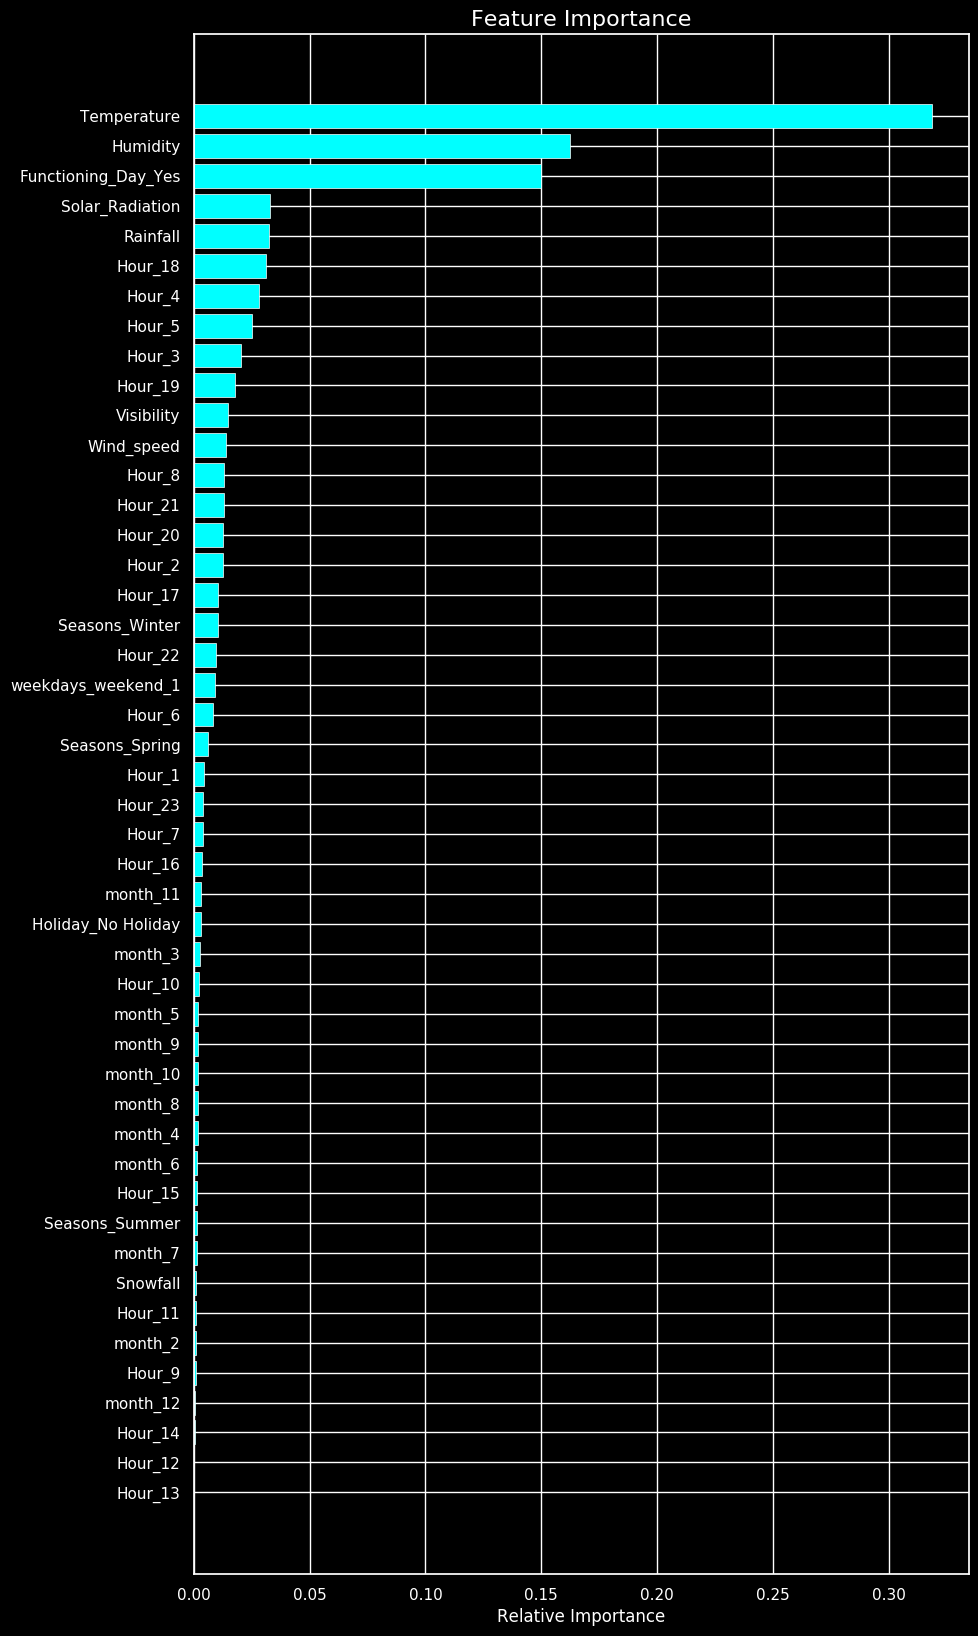

In [152]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

####ML model -6
#Implementing XG Boost Regression

In [153]:
# Using Pandas get Dummies for Encoding categorical features
df1 = pd.get_dummies(df,drop_first=True,sparse=False)
X = df1.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df1['Rented_Bike_Count'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [154]:
# Initializing the model
xgb_r = xgb.XGBRegressor()

In [155]:
#Fitting the model
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [156]:
#Train Test values
y_pred_train_xgb = xgb_r.predict(X_train)
y_pred_test_xgb = xgb_r.predict(X_test)

In [157]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 3.4783809147788998
RMSE : 1.8650417997403972
MAE : 1.3018325656908216
R2 : 0.9774117437372724
Adjusted R2 : 0.9769161097296402


#R2 score value is 0.97 it means that our model is able to capture most of the data variance.

In [158]:
dict1={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [159]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xgb))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xgb))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xgb))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 14.268169199035887
RMSE : 3.7773230202136387
MAE : 2.560580313334528
R2 : 0.9096759254063012
Adjusted R2 : 0.9076940246098941


In [160]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG Boost Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [161]:
# Feature importances
xgb_r.feature_importances_

array([0.02313511, 0.01941033, 0.00117249, 0.00153003, 0.00782443,
       0.02586562, 0.00287726, 0.00488826, 0.03429088, 0.03923116,
       0.07814232, 0.05650761, 0.01680355, 0.00419498, 0.01310121,
       0.00235391, 0.01300562, 0.0062734 , 0.00139512, 0.00098864,
       0.00207228, 0.00272448, 0.00570411, 0.02706396, 0.06966188,
       0.04754547, 0.0476852 , 0.06017982, 0.06080744, 0.01063866,
       0.00767506, 0.00221026, 0.05026473, 0.0048062 , 0.2145428 ,
       0.00141204, 0.00214004, 0.00135947, 0.00264125, 0.00349684,
       0.00174758, 0.00228374, 0.0023259 , 0.0045516 , 0.00438657,
       0.00088201, 0.00619858], dtype=float32)

In [162]:
features = X_train.columns
importances = xgb_r.feature_importances_
indices = np.argsort(importances)

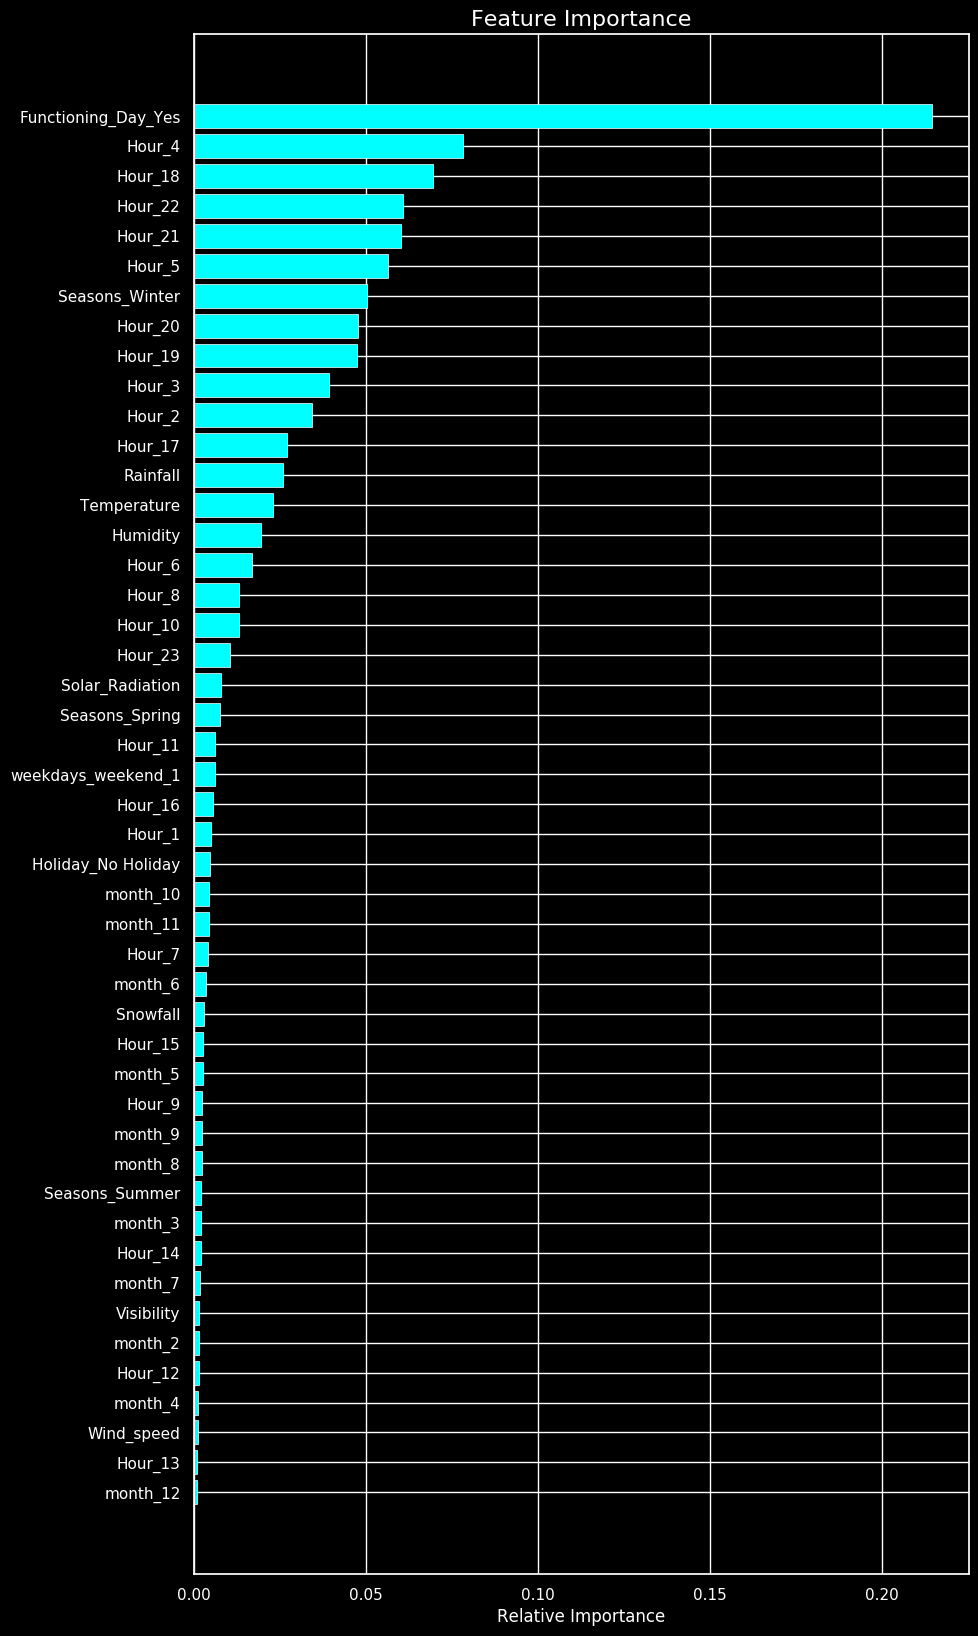

In [163]:
#Plotting figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='aqua', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

####Hyperparameter Tuning
*For improvement of our model let's do some Hyper parameter tuning.*
XG boost Regressor with GridSearchCV


In [164]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
parameter_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [165]:
parameter_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [166]:
# Create an instance of the XG Boost Regressor
xg_boost = xgb.XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[19:22:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.5s
[19:22:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[19:22:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[19:22:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[19:22:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [167]:
xg_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [169]:
xg_optimal_model = xg_grid.best_estimator_

In [170]:
#Train Test values
y_pred_train_xg_opt = xg_optimal_model.predict(X_train)
y_pred_test_xg_opt= xg_optimal_model.predict(X_test)

In [171]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 3.4783809147788998
RMSE : 1.8650417997403972
MAE : 1.3018325656908216
R2 : 0.9774117437372724
Adjusted R2 : 0.9769161097296402


In [172]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [173]:
# Calculating Performance Metrics for Test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_xg_opt))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_xg_opt))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_xg_opt))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_xg_opt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 14.268169199035887
RMSE : 3.7773230202136387
MAE : 2.560580313334528
R2 : 0.9096759254063012
Adjusted R2 : 0.9076940246098941


In [174]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'XG boost regg GridserachCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [175]:
xg_optimal_model.feature_importances_

array([0.02313511, 0.01941033, 0.00117249, 0.00153003, 0.00782443,
       0.02586562, 0.00287726, 0.00488826, 0.03429088, 0.03923116,
       0.07814232, 0.05650761, 0.01680355, 0.00419498, 0.01310121,
       0.00235391, 0.01300562, 0.0062734 , 0.00139512, 0.00098864,
       0.00207228, 0.00272448, 0.00570411, 0.02706396, 0.06966188,
       0.04754547, 0.0476852 , 0.06017982, 0.06080744, 0.01063866,
       0.00767506, 0.00221026, 0.05026473, 0.0048062 , 0.2145428 ,
       0.00141204, 0.00214004, 0.00135947, 0.00264125, 0.00349684,
       0.00174758, 0.00228374, 0.0023259 , 0.0045516 , 0.00438657,
       0.00088201, 0.00619858], dtype=float32)

In [176]:
xg_optimal_model.fit(X_train,y_train)

[19:29:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [177]:
features = X_train.columns
importance = xg_optimal_model.feature_importances_
index = np.argsort(importance)

Text(0.5, 0, 'Relative Importance')

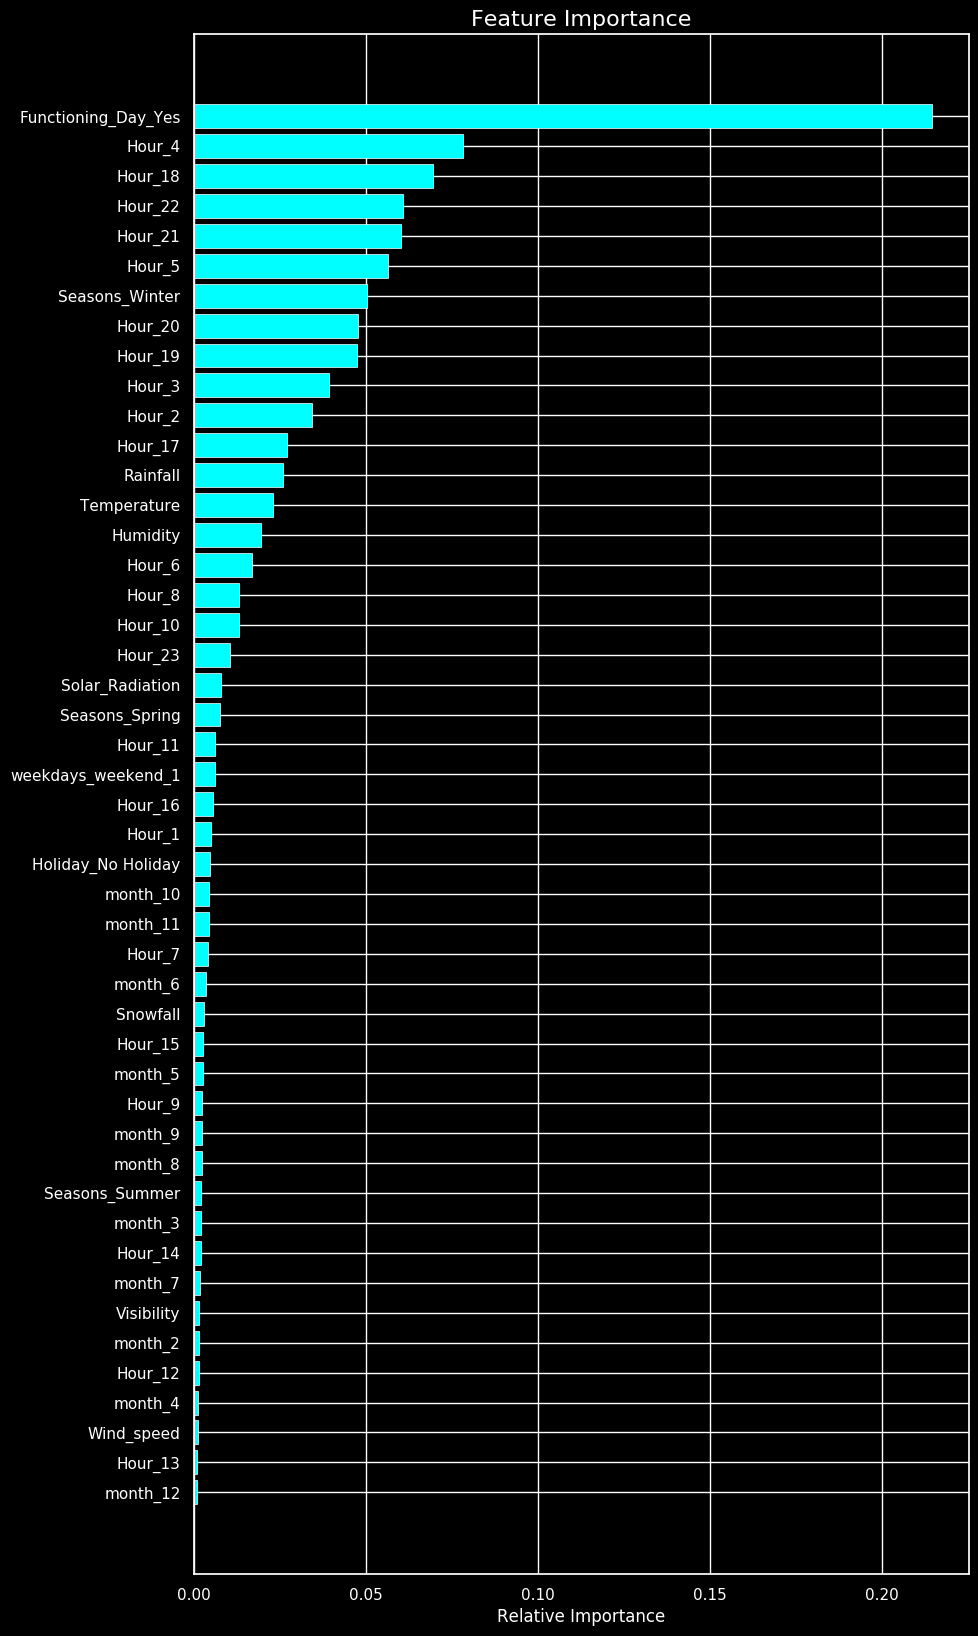

In [178]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.style.use('dark_background')
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index], color='aqua', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')

##### Which hyperparameter optimization technique have you used and why?

I use grid search cv to get more accurate Hyperparameters.

####1. Which ML model did you choose from the above created models as your final prediction model and why?

Out of all above models Random forest Regressor gives the highest R2 score of 98% for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 90% for Test set. We can deploy XG Boost Gridsearch CV model because it gives more generalised result.

# **Conclusion**

In our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable i.e, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class. we also analysed numerical variable, check out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

Next we implemented 6 machine learning algorithms Linear Regression, Lasso,Ridge,Decision Tree, Random Forest, XGBoost and XGBoost with Grid Search CV. We did some hyperparameter tuning to improve our model performance.

Following are the results of our evaluation:

In [179]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE     R2  \
Training set 0          Linear regression   4.658  37.606  6.132  0.756   
             1            Ridge regression  4.658  37.606  6.132  0.756   
             2            Lasso regression  7.255  91.594  9.570  0.405   
             3    Decision tree regression  5.124  48.195  6.942  0.687   
             4    Random forest regression  0.949   2.068  1.438  0.987   
             5         XG Boost Regression  1.302   3.478  1.865  0.977   
             6  XG boost regg GridserachCV  1.302   3.478  1.865  0.977   
Test set     0          Linear regression   4.658  36.645  6.053  0.768   
             1            Ridge regression  4.659  36.647  6.054  0.768   
             2            Lasso regression  7.456  96.775  9.837  0.387   
             3    Decision tree regression  5.607  60.335  7.768  0.618   
             4    Random forest regression  2.592  15.947  3.993  0.899   
             5         XG Boost Regression  2.561  14.268  3.777  0.910   
             6  XG boost regg GridserachCV  2.561  14.268  3.777  0.910   

                Adj_R2  
Training set 0    0.75  
             1    0.75  
             2    0.39  
             3    0.68  
             4    0.99  
             5    0.98  
             6    0.98  
Test set     0    0.76  
             1    0.76  
             2    0.37  
             3    0.61  
             4    0.90  
             5    0.91  
             6    0.91

Out of all above models Random forest Regressor gives the highest R2 score of 99% (rounded value) for Train Set and XG Boost Gridsearch CV gives the highest R2 score of 91% (rounded value)  for Test set.

No overfitting is seen.

We can deploy XG Boost Gridsearch CV model.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***